<div style="background-color: lightblue; padding: 20px; text-align: center; font-size: 25px;">
  <b> Project: Insurance Cost Analysis </b> </div>

<b> In this project, I have perform analytics operations on an insurance database that uses the below mentioned parameters. </b>

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, I will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup

<b> I will be use these following libraries: </b>
*   `pandas` for managing the data.
*   `numpy` for mathematical operations.
*    `sklearn` for machine learning and machine-learning-pipeline related functions.
*   `seaborn` for visualizing the data.
*   `matplotlib` for additional plotting tools.


In [2]:
pip install pandas numpy scikit-learn seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns , warnings , requests

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
filename = "Insurance.csv"
response = requests.get(filepath)

with open (filename , "wb") as f:
    f.write(response.content)

In [6]:
df = pd.read_csv(filename)
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [7]:
headers = [ 'age','gender','bmi','no_of_children' ,'smoker','region','charges']

df.columns = headers

In [8]:
issue_summary = pd.DataFrame({
    'Null Values': df.isnull().sum(),
    'Question Marks': (df == '?').sum(),
    'Whitespace Only': df.map(lambda x: isinstance(x, str) and x.strip() == '').sum()
})

issue_summary


,Null Values,Question Marks,Whitespace Only
age,0,4,0
gender,0,0,0
bmi,0,0,0
no_of_children,0,0,0
smoker,0,7,0
region,0,0,0
charges,0,0,0


In [9]:
df[df.isin(['?']).any(axis=1)]

,age,gender,bmi,no_of_children,smoker,region,charges
4,31,1,25.740,0,?,4,3756.62160
27,23,2,17.385,1,?,1,2775.19215
71,53,1,28.100,3,?,3,11741.72600
121,20,1,28.975,0,?,1,2257.47525
175,38,2,27.835,2,?,1,6455.86265
233,?,2,24.510,2,0,1,6710.19190
241,55,1,26.800,1,?,3,35160.13457
323,29,2,27.200,0,?,3,2866.09100
1835,?,2,29.600,4,0,3,7512.26700
2179,?,1,31.920,2,0,1,7209.49180


In [10]:
df.replace('?', np.nan , inplace = True)

In [11]:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)


mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)


df[["age","smoker"]] = df[["age","smoker"]].astype("int")


In [12]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   18       2  33.770               1       0       4   1725.55
1   28       2  33.000               3       0       4   4449.46
2   33       2  22.705               0       0       1  21984.47
3   32       2  28.880               0       0       1   3866.86
4   31       1  25.740               0       0       4   3756.62


(0.0, 66902.85800000001)

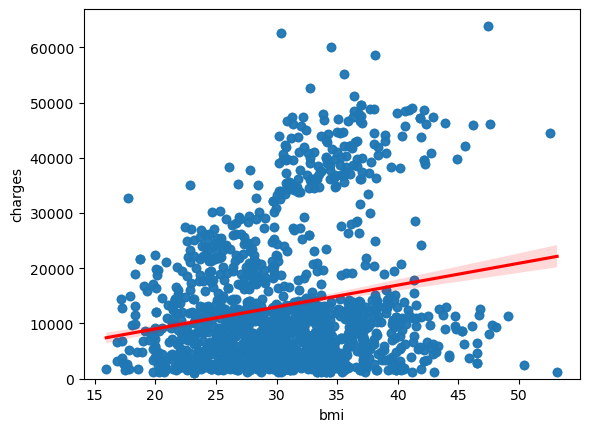

In [14]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

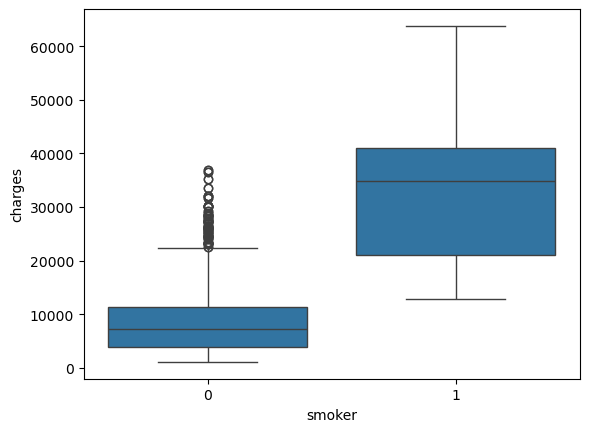

In [15]:
sns.boxplot(x="smoker", y="charges", data=df)

In [16]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


In [19]:
from sklearn.linear_model import LinearRegression

X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.6227430402464125

In [20]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
lm.score(Z, Y)

0.7505888664568174

In [26]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y, ypipe)
rmse = mse ** 0.5

print("R²:", r2_score(Y, ypipe))
print("MSE:", mse)
print("RMSE:", rmse)


R²: 0.8453719105568606
MSE: 22832499.500846684
RMSE: 4778.336478404036


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [41]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)


print(r2_score(y_test,yhat))

0.725419885841223


In [42]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)


print(r2_score(y_test,y_hat))

0.820841319517228


### Conclusion:
#### The model achieved an R² score of 0.8208, suggesting that approximately 82% of the variance in the target variable 
#### is explained by the model - reflecting an excellent fit and reliable performance.
